## <b> Topic Modeling using LSA (Latent Semantic Analysis)    
    
[A topic model](https://en.wikipedia.org/wiki/Topic_model) is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear approximately equally in both. The "topics" produced by topic modeling techniques are clusters of similar words.

- LSA or LSI – Latent Semantic Analysis or Latent Semantic Indexing – Uses Singular Value Decomposition (SVD) on the Document-Term Matrix. Based on Linear Algebra

Given a m number of text documents with n number of total unique terms (words). The ideia is to extract k topics from all the text data in the documents. The number of topics, k, has to be specified by the user. 
    
1. Generate a document-term matrix of shape m x n having, per example, TF-IDF scores;
2. Then, reduce the dimensions of the above matrix to k (no. of desired topics) dimensions, using singular-value decomposition (SVD);

[SVD](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/) decomposes a matrix into three other matrices. When we decompose a matrix A using SVD, it will be decomposed into matrix U, matrix S, and VT (transpose of matrix V). Each row of the matrix Uk (document-term matrix) is the vector representation of the corresponding document. The length of these vectors is k, which is the number of desired topics. Vector representation for the terms in our data can be found in the matrix Vk (term-topic matrix).

SVD will provide vectors for every document and term in the data. The length of each vector would be k. Then these vectors can be used to find similar words and similar documents using the cosine similarity method.
    
[Gensim](https://radimrehurek.com/gensim/)

### <b> Setup 

In [14]:
import os.path
import matplotlib.pyplot as plt
import pandas as pd

from gensim import corpora
import gensim
from gensim.models.coherencemodel import CoherenceModel

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from src import Cleaning

### <b> Data Loading


In [3]:
papers_df = pd.read_csv('../datasets/papers.csv')
papers_df = papers_df[['TITLE', 'ABSTRACT']]

### <b> Data Processing 


In [4]:
clean_text = Cleaning.DataCleaning()
papers_df.loc[:, 'clean_title'] = papers_df['TITLE'].apply(lambda x: clean_text(x))
papers_df.loc[:, 'clean_text'] = papers_df['ABSTRACT'].apply(lambda x: clean_text(x))

In [5]:
papers_df[['TITLE', 'clean_title']].sample(10)

,TITLE,clean_title
3569,Joint estimation of genetic and parent-of-orig...,"[joint, estimation, genetic, effect, using, da..."
6776,The Minimal Resolution Conjecture on a general...,"[minimal, resolution, conjecture, general, qua..."
15566,A Note on Multiparty Communication Complexity ...,"[note, multiparty, communication, complexity, ..."
12133,Hamiltonicity is Hard in Thin or Polygonal Gri...,"[hamiltonicity, hard, thin, polygonal, grid, g..."
13975,Sparse Poisson Regression with Penalized Weigh...,"[sparse, poisson, regression, penalized, weigh..."
17497,Unsupervised Object Discovery and Segmentation...,"[unsupervised, object, discovery, segmentation]"
7501,Dynamic behaviour of Multilamellar Vesicles un...,"[dynamic, behaviour, multilamellar, vesicle, p..."
6757,The extension of some D(4)-pairs,[extension]
1324,Spectral analysis of stationary random bivaria...,"[spectral, analysis, stationary, random, bivar..."
9279,Deep Reinforcement Learning that Matters,"[deep, reinforcement, learning, matter]"


## <b> LSA

#### Prepare Corpus


In [7]:
doc_clean = papers_df['clean_text']
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

#### Number of Topics

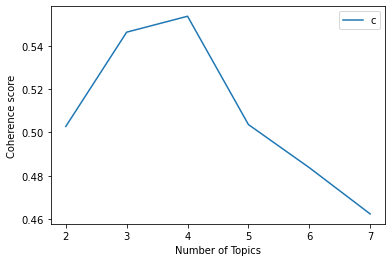

In [17]:
coherence_values = []
model_list = []
start = 2
stop = 8
step = 1
for num_topics in range(start, stop, step):
    # generate LSA model
    model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
    
# Show graph
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
number_of_topics = 4
words = 10
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary) 

In [20]:
top_n_words_lsa = lsamodel.print_topics(num_topics=number_of_topics, num_words=words)
topics = lsamodel.show_topics(formatted=False)

In [21]:
topics_words = {}
for topic in topics:
    topics_words[topic[0]] = ", ".join(list(dict(topic[1]).keys()))

In [22]:
topics_words

{0: 'model, data, method, network, problem, algorithm, result, system, show, learning',
 1: 'model, problem, algorithm, network, n, data, function, result, graph, system',
 2: 'network, model, learning, neural, method, system, deep, algorithm, field, task',
 3: 'data, network, method, system, algorithm, learning, state, problem, field, approach'}